In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [2]:
# Import all cvs files (4 stocks, ETF, and 10yr T-Bill)

In [4]:
shel_df = pd.read_csv(Path('data/SHEL_5yr_time_series.csv'), 
                index_col = 'Date',
                parse_dates = True,
                infer_datetime_format = True,                      
                     )
shel_df = shel_df["Adj Close"]

In [5]:
xom_df = pd.read_csv(Path('data/XOM_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
xom_df = xom_df["Adj Close"]

In [6]:
cvx_df = pd.read_csv(Path('data/CVX_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cvx_df = cvx_df["Adj Close"]

In [7]:
cop_df = pd.read_csv(Path('data/COP_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
cop_df = cop_df["Adj Close"]

In [8]:
ixc_df = pd.read_csv(Path('data/IXC_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
ixc_df = ixc_df["Adj Close"]

In [9]:

treasury_df = pd.read_csv(Path('data/10_yr_treasury_5yr_time_series.csv'),
                index_col = 'Date',
                    parse_dates = True,
                      infer_datetime_format = True,
                      
                     )
treasury_df = treasury_df["Adj Close"]

In [10]:
energy_stocks_df = pd.concat([shel_df, cop_df,cvx_df,xom_df,ixc_df],
                            axis=1)
energy_stocks_df=energy_stocks_df.set_axis(['SHEL', 'COP', 'CVX','XOM', 'IXC'], axis=1)

In [11]:
display(energy_stocks_df.head())
display(energy_stocks_df.tail())


,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-10-01,49.569248,43.725098,92.921890,64.010841,27.338148
2017-11-01,50.426472,43.726921,95.407494,63.964775,27.707043
2017-12-01,53.255947,47.173164,101.318382,64.828041,28.508978
2018-01-01,56.074009,50.542061,101.447868,67.664841,29.981033
2018-02-01,50.509724,46.674702,90.578758,58.704857,27.226599


,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2022-05-01,58.160614,108.933136,171.674988,94.112198,39.707764
2022-06-01,51.797909,87.461830,143.476334,84.815910,33.274773
2022-07-01,52.877651,95.618851,162.305252,95.997269,36.250000
2022-08-01,52.481411,107.415405,156.636765,94.670158,36.900002
2022-09-01,49.759998,100.889244,143.669998,87.309998,33.330002


In [12]:
# Calculating Pct Change for each stock and ETF

energy_stocks_returns = energy_stocks_df.pct_change().dropna()
energy_stocks_returns.head()

,SHEL,COP,CVX,XOM,IXC
Date,,,,,
2017-11-01,0.017293,0.000042,0.026749,-0.000720,0.013494
2017-12-01,0.056111,0.078813,0.061954,0.013496,0.028943
2018-01-01,0.052915,0.071416,0.001278,0.043759,0.051635
2018-02-01,-0.099231,-0.076518,-0.107140,-0.132417,-0.091873
2018-03-01,0.023208,0.097571,0.029085,-0.004846,0.017061


In [46]:
#Get the Risk Free Rate from treasury_df
risk_free_rate = treasury_df.mean() / 100

Expected_returns = risk_free_rate

Expected_returns


0.019737833333333333

In [47]:
# Sortino ratio for shell

# Step 1: Calculating the excess returns 

shell_returns = shel_df.pct_change().dropna()
Shell_Excess_returns = shell_returns - Expected_returns

# Step 2: Calulcating negative excess returns

boolean_filter = Shell_Excess_returns < 0
Negative_excess_shell_returns = Shell_Excess_returns.loc[boolean_filter]
Negative_excess_shell_returns.head()


Date
2017-11-01   -0.002444
2018-02-01   -0.118969
2018-05-01   -0.024316
2018-06-01   -0.011552
2018-07-01   -0.032160
Name: Adj Close, dtype: float64

In [48]:
# Step 3: Calculating square of negative excess returns

Square_of_negative_excess_shell_returns = Negative_excess_shell_returns**2
Square_of_negative_excess_shell_returns.head()

Date
2017-11-01    0.000006
2018-02-01    0.014154
2018-05-01    0.000591
2018-06-01    0.000133
2018-07-01    0.001034
Name: Adj Close, dtype: float64

In [58]:
# Step 4: Caluclating the downsize risk and annualizing

SD_negative_excess_shell_returns = np.sqrt(Square_of_negative_excess_shell_returns.sum()/12)

# Step 5: Calculating average excess returns and annualizing

Average_Shell_Excess_returns= Shell_Excess_returns.sum()/12

# Step 6: Calculating the Sortino ratio

Sortino_ratio_shell= Average_Shell_Excess_returns/SD_negative_excess_shell_returns
Sortino_ratio_shell

-0.5635531541875928

In [49]:
#Sortino ratio for Chevron

# Step 1: Calculating the excess returns 

chev_returns = cvx_df.pct_change().dropna()
chev_Excess_returns = chev_returns - Expected_returns

# Step 2: Calulcating negative excess returns

boolean_filter = chev_Excess_returns < 0
Negative_excess_chev_returns = chev_Excess_returns.loc[boolean_filter]
Negative_excess_chev_returns.head()






Date
2018-01-01   -0.018460
2018-02-01   -0.126878
2018-05-01   -0.026212
2018-07-01   -0.021003
2018-08-01   -0.081589
Name: Adj Close, dtype: float64

In [50]:
# Step 3: Calculating square of negative excess returns

Square_of_negative_excess_chev_returns = Negative_excess_chev_returns**2
Square_of_negative_excess_chev_returns.head()

Date
2018-01-01    0.000341
2018-02-01    0.016098
2018-05-01    0.000687
2018-07-01    0.000441
2018-08-01    0.006657
Name: Adj Close, dtype: float64

In [59]:
# Step 4: Caluclating the downsize risk and annualizing

SD_negative_excess_chev_returns = np.sqrt(Square_of_negative_excess_chev_returns.sum()/12)

# Step 5: Calculating average excess returns and annualizing

Average_chev_Excess_returns= chev_Excess_returns.sum()/12

# Step 6: Calculating the Sortino ratio

Sortino_ratio_chev= Average_chev_Excess_returns/SD_negative_excess_chev_returns
Sortino_ratio_chev

-0.2868677241223427

In [52]:
# Sortino ratio for Exxon

# Step 1: Calculating the excess returns 

Exxon_returns = xom_df.pct_change().dropna()
Exxon_Excess_returns = Exxon_returns - Expected_returns

# Step 2: Calulcating negative excess returns

boolean_filter = Exxon_Excess_returns < 0
Negative_excess_Exxon_returns = Exxon_Excess_returns.loc[boolean_filter]
Negative_excess_Exxon_returns.head()



Date
2017-11-01   -0.020457
2017-12-01   -0.006242
2018-02-01   -0.152155
2018-03-01   -0.024584
2018-07-01   -0.034484
Name: Adj Close, dtype: float64

In [51]:
# Step 3: Calculating square of negative excess returns

Square_of_negative_excess_Exxon_returns = Negative_excess_Exxon_returns**2
Square_of_negative_excess_Exxon_returns.head()

Date
2017-11-01    0.000419
2017-12-01    0.000039
2018-02-01    0.023151
2018-03-01    0.000604
2018-07-01    0.001189
Name: Adj Close, dtype: float64

In [60]:
# Step 4: Caluclating the downsize risk and annualizing

SD_negative_excess_Exxon_returns = np.sqrt(Square_of_negative_excess_Exxon_returns.sum()/12)

# Step 5: Calculating average excess returns and annualizing

Average_Exxon_Excess_returns= Exxon_Excess_returns.sum()/12

# Step 6: Calculating the Sortino ratio

Sortino_ratio_Exxon= Average_Exxon_Excess_returns/SD_negative_excess_Exxon_returns
Sortino_ratio_Exxon

-0.30600203667151143

In [54]:
#Sortino ratio for Connoco

# Step 1: Calculating the excess returns 

conno_returns = cop_df.pct_change().dropna()
conno_Excess_returns = conno_returns - Expected_returns

# Step 2: Calulcating negative excess returns

boolean_filter = conno_Excess_returns < 0
Negative_excess_conno_returns = conno_Excess_returns.loc[boolean_filter]
Negative_excess_conno_returns.head()



Date
2017-11-01   -0.019696
2018-02-01   -0.096255
2018-10-01   -0.116637
2018-11-01   -0.068973
2018-12-01   -0.077610
Name: Adj Close, dtype: float64

In [53]:
# Step 3: Calculating square of negative excess returns

Square_of_negative_excess_conno_returns = Negative_excess_conno_returns**2
Square_of_negative_excess_conno_returns.head()

Date
2017-11-01    0.000388
2018-02-01    0.009265
2018-10-01    0.013604
2018-11-01    0.004757
2018-12-01    0.006023
Name: Adj Close, dtype: float64

In [61]:
# Step 4: Caluclating the downsize risk and annualizing

SD_negative_excess_conno_returns = np.sqrt(Square_of_negative_excess_conno_returns.sum()/12)

# Step 5: Calculating average excess returns and annualizing

Average_conno_Excess_returns= conno_Excess_returns.sum()/12

# Step 6: Calculating the Sortino ratio

Sortino_ratio_conno= Average_conno_Excess_returns/SD_negative_excess_conno_returns
Sortino_ratio_conno


0.06206900238000019

In [55]:
# Sortino ratio for ICX

# Step 1: Calculating the excess returns 

ETF_returns = ixc_df.pct_change().dropna()
ETF_Excess_returns = ETF_returns - Expected_returns

# Step 2: Calulcating negative excess returns

boolean_filter = ETF_Excess_returns < 0
Negative_excess_ETF_returns = ETF_Excess_returns.loc[boolean_filter]
Negative_excess_ETF_returns.head()



Date
2017-11-01   -0.006244
2018-02-01   -0.111610
2018-03-01   -0.002677
2018-05-01   -0.007859
2018-06-01   -0.022406
Name: Adj Close, dtype: float64

In [56]:
# Step 3: Calculating square of negative excess returns

Square_of_negative_excess_ETF_returns = Negative_excess_ETF_returns**2
Square_of_negative_excess_ETF_returns.head()

Date
2017-11-01    0.000039
2018-02-01    0.012457
2018-03-01    0.000007
2018-05-01    0.000062
2018-06-01    0.000502
Name: Adj Close, dtype: float64

In [62]:
# Step 4: Caluclating the downsize risk and annualizing

SD_negative_excess_ETF_returns = np.sqrt(Square_of_negative_excess_ETF_returns.sum()/12)

# Step 5: Calculating average excess returns and annualizing

Average_ETF_Excess_returns= ETF_Excess_returns.sum()/12

# Step 6: Calculating the Sortino ratio

Sortino_ratio_ETF= Average_ETF_Excess_returns/SD_negative_excess_ETF_returns
Sortino_ratio_ETF


-0.3804752781531778

In [45]:
data = {'Company': ['Shell','COP','CVX','XOM', 'ICX'], 
        'Sortino Ratio': [Sortino_ratio_shell, Sortino_ratio_conno , Sortino_ratio_chev, Sortino_ratio_Exxon , Sortino_ratio_ETF]}

sortino_ratios = pd.DataFrame(data, columns= ['Company','Sortino Ratio'])
print (sortino_ratios)


  Company  Sortino Ratio
0   Shell      -0.563553
1     COP       0.062069
2     CVX      -0.286868
3     XOM      -0.306002
4     ICX      -0.380475


<AxesSubplot:title={'center':'Sortino Ratios'}>

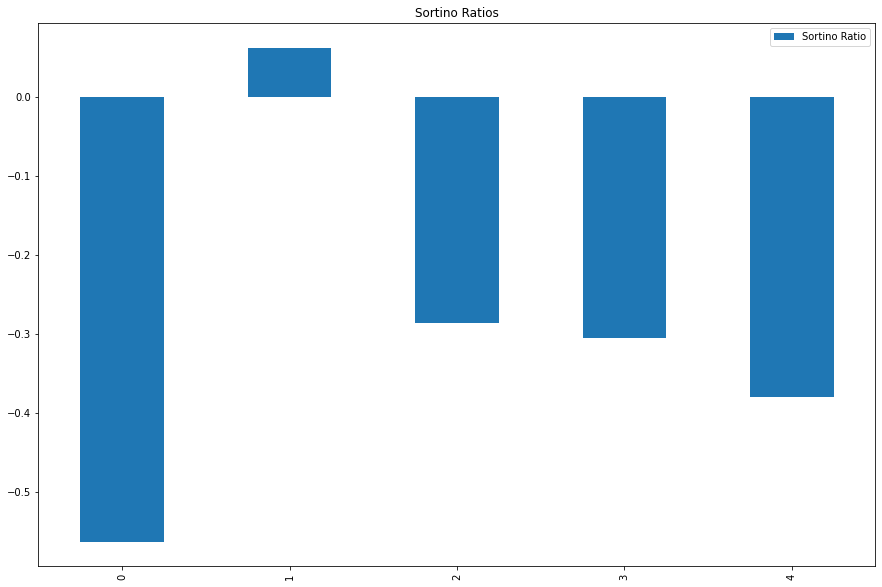

In [44]:
sortino_ratios.plot.bar(figsize=(15,10), title="Sortino Ratios")

In [27]:
# Analysis: The Sortino ratio higher than 0 is considered to be better. The above plot shows that the Sortino ratio for "Conoco" is above 0. Therefore we can conclude that it has generated more returns compared with other stocks
# and ETF and "Conoco" has a great chance to avoid large losses.

SyntaxError: invalid syntax (<ipython-input-27-e39a19369af1>, line 1)